# Bootstrap ODP Backtest

Bootstrap the Meyers subset triangles (actual train/test split from the R package) with `BootstrapODPSample`.

## Setup

In [1]:
import pandas as pd
import reservetestr as rt

In [2]:
records = rt.build_triangle_records()
subset = records[:50]  # keep runtime manageable
len(subset)

50

## Run the bootstrap sampler

In [7]:
bootstrap_results = rt.run_single_backtest(
    subset,
    rt.testr_bootstrap_odp,
    lines_to_include=["comauto", "ppauto", "wkcomp", "othliab"],
    loss_type="paid",
    method_label="bootstrap_paid_meyers",
    n_sims=5000,
    hat_adj=True,
    random_state=123
)
bootstrap_results.head()

/Users/atroyer/.local/lib/python3.11/site-packages/chainladder/adjustments/bootstrap.py:208: RuntimeWarning: divide by zero encountered in matmul
  design_matrix.T, xp.matmul(weight_matrix, design_matrix)
/Users/atroyer/.local/lib/python3.11/site-packages/chainladder/adjustments/bootstrap.py:208: RuntimeWarning: overflow encountered in matmul
  design_matrix.T, xp.matmul(weight_matrix, design_matrix)
/Users/atroyer/.local/lib/python3.11/site-packages/chainladder/adjustments/bootstrap.py:208: RuntimeWarning: invalid value encountered in matmul
  design_matrix.T, xp.matmul(weight_matrix, design_matrix)
/Users/atroyer/.local/lib/python3.11/site-packages/chainladder/adjustments/bootstrap.py:207: RuntimeWarning: divide by zero encountered in matmul
  xp.matmul(
/Users/atroyer/.local/lib/python3.11/site-packages/chainladder/adjustments/bootstrap.py:207: RuntimeWarning: overflow encountered in matmul
  xp.matmul(
/Users/atroyer/.local/lib/python3.11/site-packages/chainladder/adjustments/boots

,line,group_id,company,method,actual_ultimate,actual_unpaid,mean_ultimate_est,mean_unpaid_est,stddev_est,cv_unpaid_est,implied_pctl
0,comauto,353,Celina Mut Grp,bootstrap_paid_meyers,40000.0,7399.0,39245.590330,6644.590330,2397.226187,0.360779,0.6338
1,comauto,388,Federal Ins Co Grp,bootstrap_paid_meyers,745997.0,189270.0,715797.117592,159070.117592,48090.923989,0.302325,0.7424
2,comauto,620,Employers Mut Co Of Des Moines,bootstrap_paid_meyers,388485.0,89855.0,398722.955036,100092.955036,13880.046083,0.138672,0.2308
3,comauto,671,Farm Bureau Of MI Grp,bootstrap_paid_meyers,52884.0,13739.0,58772.708266,19627.708266,3888.304424,0.198103,0.0576
4,comauto,715,West Bend Mut Ins Grp,bootstrap_paid_meyers,107590.0,27777.0,113680.039787,33867.039787,4345.084343,0.128298,0.0754


In [8]:
bootstrap_results.describe(include='all')

,line,group_id,company,method,actual_ultimate,actual_unpaid,mean_ultimate_est,mean_unpaid_est,stddev_est,cv_unpaid_est,implied_pctl
count,50,50.000000,50,50,5.000000e+01,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000
unique,1,NaN,50,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,comauto,NaN,Celina Mut Grp,bootstrap_paid_meyers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,50,NaN,1,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8697.840000,NaN,NaN,1.305662e+05,25414.660000,1.327059e+05,27554.385081,5886.886415,3.226457,0.436516
std,NaN,6188.852115,NaN,NaN,3.398212e+05,59916.236036,3.464242e+05,65880.026091,9974.176345,13.392556,0.287534
min,NaN,353.000000,NaN,NaN,1.064000e+03,84.000000,1.186188e+03,10.022345,90.978485,0.081286,0.027400
25%,NaN,2311.750000,NaN,NaN,7.815000e+03,1017.500000,7.738342e+03,981.935353,914.389628,0.221843,0.176000
50%,NaN,8549.500000,NaN,NaN,2.155900e+04,4647.000000,2.372094e+04,4290.779276,1658.385797,0.372258,0.422500
75%,NaN,14143.000000,NaN,NaN,9.015950e+04,16154.500000,8.970921e+04,19668.190716,4394.940383,0.676248,0.659000


## Visual diagnostics

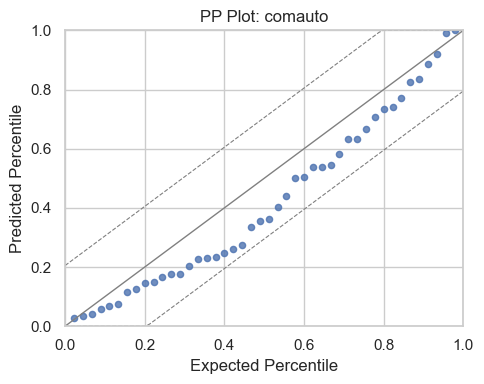

In [9]:
pp_fig = rt.create_pp_plot(bootstrap_results, cv_limits=(0.0, 1.0), by_line=True)

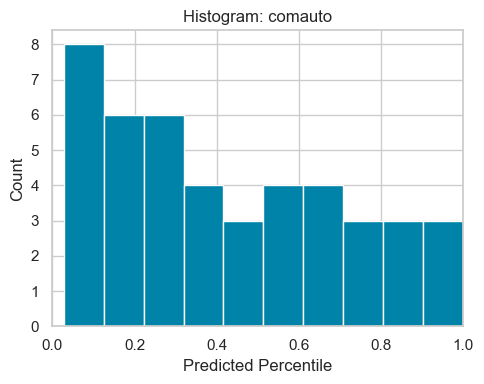

In [10]:
hist_fig = rt.create_histogram_plot(bootstrap_results, cv_limits=(0.0, 1.0), by_line=True, bins=10)